In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [18]:
train_file = "~/source/Data/mercari_price/train.tsv"
test_file = "~/source/Data/mercari_price/test.tsv"

train = pd.read_csv(train_file, sep='\t')
test = pd.read_csv(test_file, sep='\t')


In [19]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [20]:
print(train.shape)
print(test.shape)

(1482535, 8)
(693359, 7)


In [21]:
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

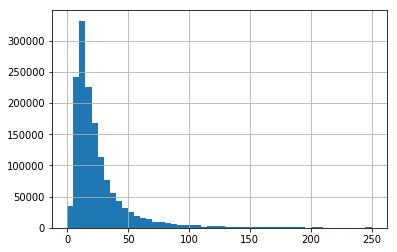

In [41]:
train.price.hist(bins = 50, range = (0, 250))

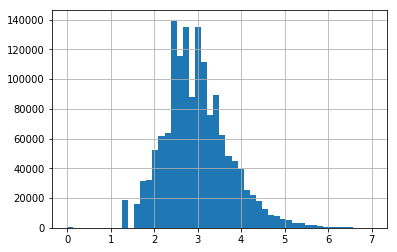

In [42]:
np.log(train.price+1).hist(bins = 50, range = (0, 7))

In [57]:
train.shipping.value_counts()/len(train)*100

0    55.272557
1    44.727443
Name: shipping, dtype: float64

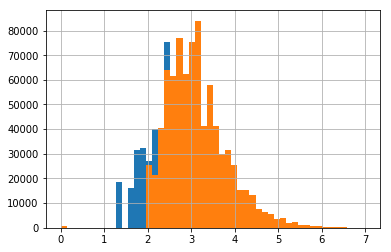

In [51]:
np.log(train.loc[train['shipping'] == 1, 'price']+1).hist(bins = 50, range = (0, 7))
np.log(train.loc[train['shipping'] == 0, 'price']+1).hist(bins = 50, range = (0, 7))

In [53]:
train.category_name.nunique()

1287

In [58]:
train.category_name.value_counts()[:10]/len(train)*100

Women/Athletic Apparel/Pants, Tights, Leggings                 4.059061
Women/Tops & Blouses/T-Shirts                                  3.128425
Beauty/Makeup/Face                                             2.315966
Beauty/Makeup/Lips                                             2.017490
Electronics/Video Games & Consoles/Games                       1.791324
Beauty/Makeup/Eyes                                             1.700803
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    1.664446
Women/Underwear/Bras                                           1.434975
Women/Tops & Blouses/Blouse                                    1.368197
Women/Tops & Blouses/Tank, Cami                                1.368197
Name: category_name, dtype: float64

In [59]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

train['general_cat'], train['subcat_1'], train['subcat_2'] = \
zip(*train['category_name'].apply(lambda x: split_cat(x)))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [62]:
print("There are %d unique main categories." % train['general_cat'].nunique())
print("There are %d unique first sub-categories." % train['subcat_1'].nunique())
print("There are %d unique second sub-categories." % train['subcat_2'].nunique())

There are 11 unique main categories.
There are 114 unique first sub-categories.
There are 871 unique second sub-categories.


In [64]:
print("There are %d unique brand names in the training dataset." % train['brand_name'].nunique())

There are 4809 unique brand names in the training dataset.
